In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Introdução

O COVID-19 afetou a vida cotidiana e está desacelerando a economia global. Esta
pandemia afetou milhares de pessoas, que estão doentes ou estão sendo mortas devido à
propagação da doença. E para auxiliar a decisão de quais medidas são necessárias para
reduzir a transmissão na comunidade faz-se o uso do modelo SEIRD para prever a progressão
da epidemia.

# Modelo SEIRD

Os modelos matemáticos de evolução epidemiológica se baseiam na solução de sistemas de
equações diferenciais acopladas. Estes modelos tratam dos grupos de indivíduos relacionados à
epidemia, de forma compartimentalizada.¹ Os compartimentos a serem modelados ou simulados
podem ser os conjuntos de pessoas suscetíveis **(S)** à doença analisada, o conjunto de indivíduos
expostos **(E)**, os infectados **(I)**, os recuperados **(R)** e os mortos **(D)** por uma doença. 

### O sistema de equações no modelo **SEIRD** é dado por:

+ $\displaystyle \frac{dS(t)}{dt} = -\frac{\beta S(t) I(t)}{N}$<br><br>
+ $\displaystyle \frac{dE(t)}{dt} = \frac{\beta S I}{N} - \sigma E(t)$<br><br>
+ $\displaystyle \frac{dI(t)}{dt} = \sigma E(t) -  \gamma I(t) - \mu I$<br><br>
+ $\displaystyle \frac{dR(t)}{dt} = \gamma I(t)$<br><br>
+ $\displaystyle \frac{dD(t)}{dt} = \mu I(t)$<br><br>
+ $N = S + E + I + R + D$<br><br>


In [2]:
def ode_model(z, t, beta, sigma, gamma, mu):
    S, E, I, R, D = z
    N = S + E + I + R + D
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]
    
def ode_solver(t, initial_conditions, params):
    initE, initI, initR, initN, initD = initial_conditions
    beta, sigma, gamma, mu = params
    initS = initN - (initE + initI + initR + initD)
    res = odeint(ode_model, [initS, initE, initI, initR, initD], t, args=(beta, sigma, gamma, mu))
    return res

### Onde,
+ **N** é o numero total da população
+ **β** é a taxa de infecção
+ **ơ** é a periodo de incubação
+ **γ** é a taxa de recuperação ou mortalidade
+ **μ** é a taxa de mortalidade devido a doença.


# Pernambuco

### Dados:

+ O território pernambucano equivale a 1,15% do brasileiro e com mais de 9.616.621 habitantes.² 
+ Em março foi confirmado os dois primeiros casos de Covid-19 no estado de Pernambuco.³
+ Em março o R0 no estado de Pernambuco era 2.36. ⁴
+ A média de moradores por domicilio em pernambuco é 3.59. Dados retirados da Base de dados do estado de Pernambuco.⁵ A media foi calculada a baixo:

In [3]:
import pandas as pd
df_domicilios_pe = pd.read_csv('Formato.csv')
df_domicilios_pe.head()

,Municipio,Domicilios_particulares,Moradores-em-domicílios-particulares-permanentes,Media-de-moradores
0,Abreu e Lima,28138,93892,3.34
1,Afogados da Ingazeira,10876,35018,3.22
2,Afrânio,4730,17558,3.71
3,Agrestina,6871,22645,3.30
4,Água Preta,7730,32427,4.19


In [4]:
# A media de moradores por domicilio em Pernambuco
df_domicilios_pe['Media-de-moradores'].mean()

3.5904864864864865

Então como inicialmente haviam 2 infectados, e as pessoas que moram com eles estavam expostas.

# Portanto inicialmente no estado de Pernambuco:

In [5]:
initN = 9616621 #População

# initS 
initE = 8
initI = 2
initR = 0
initD = 0

sigma = 1/5.2 # periodo de incubação
gamma = 1/2.9 # taxa de recuperação
mu = 0.034 # taxa de mortalidade
R0 = 2.36 # taxa de transmissibilidade
beta = R0 * gamma # taxa de transmissão
days = 240

In [6]:
initial_conditions = [initE, initI, initR, initN, initD]
params = [beta, sigma, gamma, mu]
tspan = np.linspace(0,240,240)
sol = ode_solver(tspan, initial_conditions, params)
S, E, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]

## Projeção

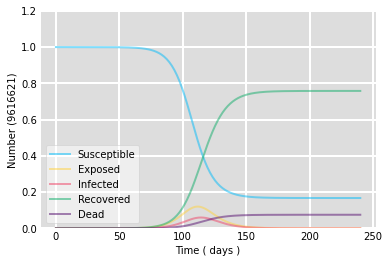

In [7]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

ax.plot(tspan, S/initN, '#00bbf9', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(tspan, E/initN, '#ffd23f', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(tspan, I/initN, '#ee4266', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(tspan, R/initN, '#0ead69', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(tspan, D/initN, '#540d6e', alpha = 0.5, lw = 2, label = 'Dead')

ax.set_xlabel('Time ( days )')
ax.set_ylabel(f'Number ({initN})')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
# plt.savefig('sir.pdf')
plt.show()

# Atualmente no Estado de Pernambuco:

Dados atualizados em GoogleNews⁶:

Recuperados em Pernambuco:

Brasil    |   Pernambuco

5.815.227  |  162.977       casos

 5.267.567   |    X         recuperados


X = (5267567*162977)/5815227 = 147628.33

In [8]:
# initN = 9616621 #População
# 
# initS 
initE = 3372
initI = 843
initR = 147628
initD = 8805

sigma = 1/5.2 # periodo de incubação
gamma = 1/2.9 # taxa de recuperação
mu = 0.034 # taxa de mortalidade
R0 = 1.8 # taxa de transmissibilidade
beta = R0 * gamma # taxa de transmissão
days = 240

initial_conditions = [initE, initI, initR, initN, initD]
params = [beta, sigma, gamma, mu]
tspan = np.linspace(0,240,240)
sol = ode_solver(tspan, initial_conditions, params)
S, E, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]

## Projeção

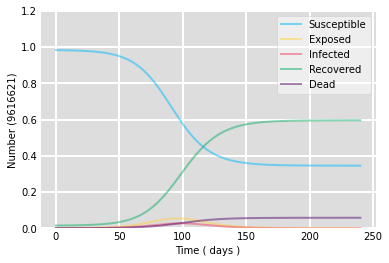

In [9]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

ax.plot(tspan, S/initN, '#00bbf9', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(tspan, E/initN, '#ffd23f', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(tspan, I/initN, '#ee4266', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(tspan, R/initN, '#0ead69', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(tspan, D/initN, '#540d6e', alpha = 0.5, lw = 2, label = 'Dead')

ax.set_xlabel('Time ( days )')
ax.set_ylabel(f'Number ({initN})')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
# plt.savefig('sir.pdf')
plt.show()

## Referências Bibliograficas

1. **Mathematical Epidemiology** | Fred Brauer | Springer. Springer.com. Disponível em: <https://www.springer.com/gp/book/9783540789109>.
1. **Pernambuco** | Cidades e Estados | IBGE. Ibge.gov.br. Disponível em: <https://www.ibge.gov.br/cidades-e-estados/pe.html>.
1. **Dois primeiros casos do novo coronavírus são confirmados em PE, diz Secretaria de Saúde.** G1. Disponível em: <https://g1.globo.com/pe/pernambuco/noticia/2020/03/12/primeiros-casos-de-coronavirus-sao-confirmados-pela-secretaria-de-saude-de-pernambuco.ghtml>.
1. Observatório Covid-19 BR. Github.io. Disponível em: <https://covid19br.github.io/estados.html?aba=aba3&uf=PE&q=dia>.
1. **Domicílios particulares permanentes, moradores e média de moradores em domicílios particulares permanentes, por situação do domicílio** BDE. Pe.gov.br. Disponível em: <http://www.bde.pe.gov.br/visualizacao/Visualizacao_formato2.aspx?CodInformacao=1111&Cod=3>. 
1. Coronavírus (COVID-19) - Google Notícias. Google Notícias. Disponível em: <https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F01hdpp&gl=BR&ceid=BR%3Apt-419>.
1. **Covid19 por Município** - Brasil.IO. Brasil.io. Disponível em: <https://brasil.io/covid19/PE/>. ‌